# <center><font color='#006666'>Yandex.Afisha marketing expenses</font></center>

<center><img src="yandex.afisha.png"></center>

## Contents<a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [General information](#Part_1)
    * [Conclusion](#Conclusion_Part_1)
<p> </p> 
* [Data pre-processing](#Part_2)
    * [The Visits dataset](#Visits)
    * [The Orders dataset](#Orders)
    * [The Costs dataset](#Costs)
    * [Conclusion](#Conclusion_Part_2)
<p> </p> 
* [Make reports and calculate metrics](#Part_3)
    * [1. Product](#Product)
    * [2. Sales](#Sales)
    * [3. Marketing](#Marketing)
<p> </p> 
* [General Conclusion](#General_Conclusion)

## Project description<a class="anchor" id="Project_description"></a>

Yandex.Afisha is a Russian-language market search and service for selling tickets for entertainment events. 
Our task is to help optimize marketing expenses.

The company provided the following data:<br>
 - server logs with data on Yandex.Afisha visits from June 2017 through May 2018
 - dump file with all orders for that period
 - marketing expenses statistics

We will focus on certain business metrics in particular and based on the data received, we will offer a solution.<br>
Analysis will show:
 - how people use the product
 - when they start to buy
 - how much money each customer brings
 - when they pay off

## General information<a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

The first step here is looking at the content of the data files.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np
#import packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install squarify
import squarify

We have three datasets from Yandex.Afisha service.

In [2]:
#source of the data:

#check memory usage
#df_visits = pd.read_csv("visits_log_us.csv", nrows=500)
#df_visits.info(memory_usage='deep')

#load files
#visits
df_visits = pd.read_csv("visits_log_us.csv", dtype={'Device': 'category', 'Source Id':'int'}
                 , parse_dates=['Start Ts', 'End Ts'])
#orders
df_orders_source = pd.read_csv("orders_log_us.csv", dtype={'Revenue': np.float32}, 
                               parse_dates=['Buy Ts'])
#costs
df_costs = pd.read_csv("costs_us.csv", dtype={'source_id':'int'}, parse_dates=['dt'])

The dataset *Visits* contains data on website visits from June 2017 through May 2018

In [3]:
#structure of the dataset
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int32         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int32(1), uint64(1)
memory usage: 9.9 MB


In [4]:
#rename columns
df_visits.columns = ['device','end_ts','source_id','start_ts','uid']
#random five rows from the dataset
df_visits.sample(5)

,device,end_ts,source_id,start_ts,uid
349180,desktop,2018-03-25 08:23:00,5,2018-03-25 07:20:00,13910548766435743648
63398,desktop,2017-07-05 13:07:00,4,2017-07-05 13:00:00,18043897847555691255
201024,touch,2017-07-17 14:15:00,9,2017-07-17 13:45:00,4703293843205445779
82641,desktop,2018-03-04 11:57:00,5,2018-03-04 11:56:00,9789295324796069134
284720,desktop,2017-09-21 14:16:00,2,2017-09-21 13:53:00,579119101501315657


The dataset *Visits* structure:

**device** — user's device<br>
**end_ts** — session end date and time<br>
**source_id** — identifier of the ad source the user came from<br>
**start_ts** — session start date and time<br>
**uid** — user's unique identifier

The dataset *Orders* contains data on ticket orders through the service.

In [5]:
#structure of the dataset
df_orders_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float32       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float32(1), uint64(1)
memory usage: 984.8 KB


In [6]:
#rename columns
df_orders_source.columns = ['buy_ts','revenue','uid']
#random five rows from the dataset
df_orders_source.sample(5)

,buy_ts,revenue,uid
33916,2018-02-10 12:34:00,0.930000,7235773451097220116
14939,2017-10-27 20:54:00,47.669998,13774155638617831954
29996,2018-01-18 22:26:00,7.330000,12353221276422578285
30736,2018-01-23 22:43:00,0.610000,9203667430669977501
19320,2017-11-24 14:44:00,1.470000,18437195840292658200


The dataset *Orders* structure:

**buy_ts** — order date and time<br>
**revenue** — Yandex.Afisha's revenue from the order<br>
**uid** — user's unique identifier

The dataset *Costs* contains data on marketing expenses.

In [7]:
#structure of the dataset
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int32         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 49.8 KB


In [8]:
#rename columns
df_costs.columns = ['source_id','cost_dt','cost']
#random five rows from the dataset
df_costs.sample(5)

,source_id,cost_dt,cost
1594,5,2017-10-21,108.48
1346,4,2018-02-13,112.65
489,2,2017-10-05,145.18
2445,10,2018-02-22,16.01
1398,4,2018-04-08,45.96


The dataset *Costs* structure:

**source_id** — ad source identifier<br>
**cost_dt** — date <br>
**cost** — expenses on this ad source on this day

## Conclusion<a class="anchor" id="Conclusion_Part_1"></a>

We have three datasets from the Yandex.Afisha service, which contain service visitors, their orders and the marketing costs of the service for the period from June 2017 through May 2018.

Datasets show data that does not contain underfined or missing values. The data content matches the description.
To optimize the analysis process, the data was converted to appropriate formats when loaded, and the columns were renamed to a convenient format.

## Data pre-processing<a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

In this step, let's look at the content of the datasets in more detail and define the patterns.

**The *Visits* dataset.** <a class="anchor" id="Visits"></a>

In [9]:
#general statistic
df_visits[['source_id','start_ts','end_ts']].describe(include='all', datetime_is_numeric=True)

,source_id,start_ts,end_ts
count,359400.000000,359400,359400
mean,3.750515,2017-12-18 06:17:32.010528,2017-12-18 06:28:15.036228608
min,1.000000,2017-06-01 00:01:00,2017-06-01 00:02:00
25%,3.000000,2017-10-15 09:41:00,2017-10-15 09:45:45
50%,4.000000,2017-12-18 18:46:00,2017-12-18 18:59:30
75%,5.000000,2018-02-28 09:54:00,2018-02-28 10:08:15
max,10.000000,2018-05-31 23:59:00,2018-06-01 01:26:00
std,1.917116,NaN,NaN


We have two unique values in the "device" column. The "source_id" column contains integer numeric values from 1 to 10. The dates correspond to the declared period.

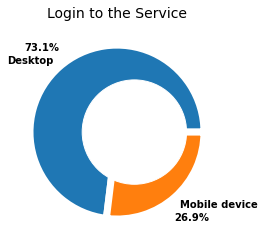

In [10]:
#shows the distribution of devices for login to the service

#prepare the dataset for plotting
df= df_visits['device'].value_counts()

#plot
names='Desktop', 'Mobile device'
plt.title('Login to the Service', size=14)
#donut pie chart
plt.pie(df, labels=names, 
        pctdistance=1.3, autopct='%1.1f%%', textprops=dict(weight="bold"),
        wedgeprops = {'linewidth': 7, 'edgecolor':'white'})
my_circle = plt.Circle((0.2,0), 0.6, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
print("There is a", round(df[0]/df[1],2),"times difference")

There is a 2.71 times difference


There are two values here: "desktop" and "touch". "Desktop" means login to the service from a computer, "touch" - from a mobile device.

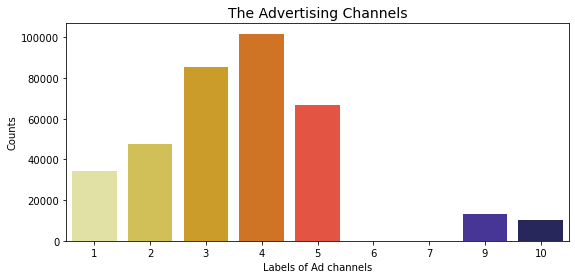

In [12]:
#shows the distribution of visits from advertising channels

#prepare the dataset for plotting
df= df_visits['source_id'].value_counts()

#barplot
plt.figure(figsize=(9,4))
plt.xlabel('Labels of Ad channels');
plt.ylabel('Counts');
sns.barplot(x=df.index, y=df.values, palette="CMRmap_r").set_title('The Advertising Channels', size=14);

The "source_id" is a label of the ad channel the user came from.<br>
As we can see, there are sources with labels from 1 to 10 (except 8). The most productive channel is labeled 4, the least used are 6 and 7.

In [13]:
#delete duplicates
df_visits.drop_duplicates(inplace=True)
print("Count rows:", df_visits.shape[0])

Count rows: 359400


There are no duplicates in the dataset *Visits*

**The *Orders* dataset.**<a class="anchor" id="Orders"></a>

In [14]:
#general statistic
df_orders_source[['buy_ts','revenue']].describe(include='all',datetime_is_numeric=True)

,buy_ts,revenue
count,50415,50415.000000
mean,2017-12-20 05:14:24.846181632,4.999462
min,2017-06-01 00:10:00,0.000000
25%,2017-10-13 17:28:00,1.220000
50%,2017-12-21 14:12:00,2.500000
75%,2018-03-02 16:10:00,4.890000
max,2018-06-01 00:02:00,2633.280029
std,NaN,21.818167


The dates correspond to the declared period.<br>
There is a problem here with the "revenue" field. It contains zero values and extremely high values. Let's look at the distribution of revenue.

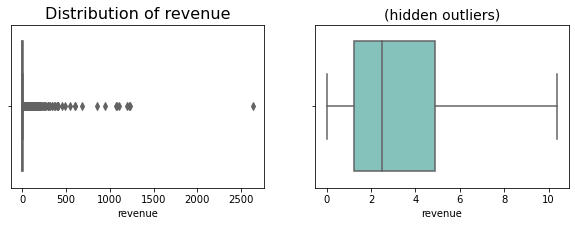

In [15]:
#box plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
#whisker plot
ax = sns.boxplot(x=df_orders_source["revenue"], palette="GnBu_r"
                 ).set_title("Distribution of revenue", size=16);
plt.subplot(1,2,2)
#whisker plot with hidden outlier points
ax = sns.boxplot(x=df_orders_source["revenue"], palette="GnBu_r", showfliers=False
                ).set_title("(hidden outliers)", size=14);

The distribution is positively skewed, the data in this field is strongly distributed to the right and has clear outliers.<br>
It can be assumed that large revenue values belong to corporate clients placing large orders. However, we do not know in what units the revenue is indicated.<br>
To ensure that high values do not reduce the statistical significance of the remaining values, we will remove some of the values.

Let's find at what values the graph drops significantly.<br>
This is the tail of the data distribution graph.

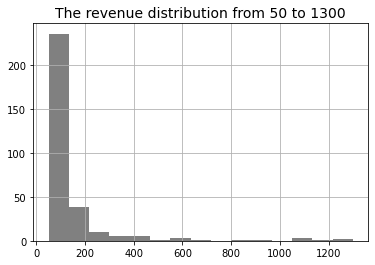

In [16]:
#distribution of dataset tail
plt.title('The revenue distribution from 50 to 1300', size=14)
df_orders_source['revenue'].hist(bins=15, color='gray', range=(50,1300));

The histogram shows a significant decline after 100.

In [17]:
print('Percentage of records to be deleted: {:.1%}'.
      format(df_orders_source[df_orders_source['revenue']>100]['revenue'].count()/df_orders_source.shape[0]))

Percentage of records to be deleted: 0.2%


In [18]:
print('Count rows with zero revenue value:',df_orders_source[(df_orders_source['revenue']==0)]['revenue'].count())

Count rows with zero revenue value: 51


This is the final dataset.

In [19]:
#orders
df_orders = df_orders_source[(df_orders_source['revenue']>0)&(df_orders_source['revenue']<100)].copy()

In [20]:
#delete duplicates
df_orders.drop_duplicates(inplace=True)
print("Count rows:", df_orders.shape[0])

Count rows: 50251


The *Orders* dataset is still strongly distributed to the right, which should be taken into account in further analysis.
Most of the data is in the range from 0 to 70.

**The *Costs* dataset.**<a class="anchor" id="Costs"></a>

In [21]:
#general statistic
df_costs.describe(include='all', datetime_is_numeric=True)

,source_id,cost_dt,cost
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403645952,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


The dates correspond to the declared period.<br>
Obviously, the "source_id" field shows the same labels as in the *Visits* dataset.

In [22]:
#counts of unique values
df_costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

There is no data in the dataset for "source_id" with labels 6 and 7.<br> 
Also label 5 has more values than other sources. Let's see the difference.

In [23]:
#group by labels of source_id and cost date
df=df_costs.pivot_table(index='cost_dt', columns='source_id', values='cost',aggfunc='count')
df['total'] = df[1]+df[2]+df[3]+df[4]+df[5]+df[9]+df[10]
#different records
df[df['total'] != 7]

source_id,1,2,3,4,5,9,10,total
cost_dt,,,,,,,,
2018-03-31,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The table shows that there are no records in the dataset with marketing expenses as of March 31, 2018, except for source_id with label 5.


In [24]:
df_costs[(df_costs['source_id']==5)&(df_costs['cost_dt']=='2018-03-31')]

,source_id,cost_dt,cost
1755,5,2018-03-31,0.7


As we can see, the value for this day is very small. Marketing costs for each advertising channel decrease by the end of the month. Perhaps, on other channels, expenses were zero that day, so they did not get into the dataset. To solve our task, we can leave the data as it is.

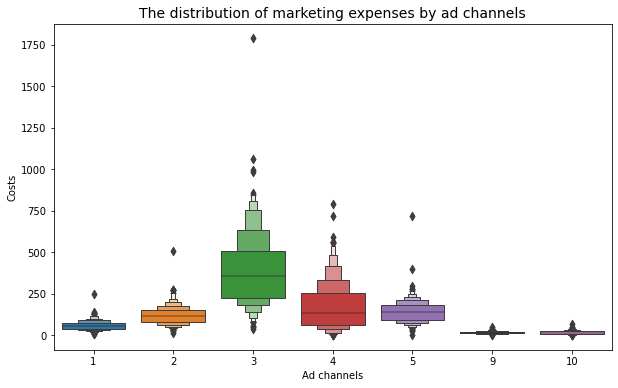

In [25]:
#distribution of dataset by ad channels
plt.figure(figsize=(10,6))
ax = (sns.boxenplot(x= df_costs.source_id, y= df_costs.cost).
      set_title('The distribution of marketing expenses by ad channels', size=14) );
plt.ylabel('Costs');
plt.xlabel('Ad channels');

As you can see, data for almost all advertising sources have a distribution twisted upward, and a small amount of emissions. Since this field contains historical data, it is possible that the outliers are related to one-off ad campaigns.

Since our main task is to propose ways to reduce marketing costs, it is possible that in further analysis we will need all the data from the dataset. Therefore, we will not remove outliers in this step, but we will keep this information in memory in order to reduce the dataset if necessary to get the correct statistics.

In [26]:
#delete duplicates
df_costs.drop_duplicates(inplace=True)
print("Count rows:", df_costs.shape[0])

Count rows: 2542


## Conclusion <a class="anchor" id="Conclusion_Part_2"></a>

Yandex.Afisha service sales became available in 2015. At the end of 2016, the service released an iOS app with the same functionality as the web version.<br> 
The dataset contains data from web-service and mobile-service. In the period from June 2017 to May 2018, the web service remains the most used.<br>
Both web users and mobile users enter the service from the same advertising sources. The dataset contains nine ad source labels from 1 to 10 (excluding 8). Most users come from label 4, less often from labels 6 and 7.<br>
There are 359400 records of user visits for analysis, the data does not have duplicates.

We also have data on orders made during the specified time period.<br>
Revenue data from orders has a skewed distribution. Such distribution is possible, since the service sells tickets for various events.<br>
However, we have 51 records where the revenue is 0. Also the dataset contains significant outliers. We cannot say whether this distribution is anomalous, since we do not know how the revenue was formed. We do not have fundamental difficulties with the dataset, so the solution to reduce the statistical noise is to slightly reduce the dataset by removing zero values and significant outliers. Revenue is limited to records having revenue up to 100.<br>
The final dataset contains 50251 records without duplicates.

To find a solution to our task, we also use data on marketing expenses. We have data on marketing costs for each ad source label except for tags 6 and 7. Since the number of visiting users from these tags is minimal, it is possible that these ad sources are no longer supported by Yandex.Afisha.<br>
We analyze a dataset with historical data on marketing expenses for almost the entire period under review. There are missing values for March 31, 2018 for all ad source labels, except for label 5. Considering the distribution of marketing expenses during the month, marketing expenses on that day were probably zero.<br>
We also have several extremely high values, which correspond to the nature of marketing expenses.<br>
This dataset contains 2542 records and no duplicates.

## Make reports and calculate metrics<a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

E-commerce businesses need to pay close attention to metrics that reflect their ability to retain customers, generate recurring revenue, and acquire customers.

A metric is something you can count, such as the number of users, events, or transactions.
KPI is a key performance indicator that is usually measured as a percentage and has a certain norm. For example, by comparing our actual KPI with the market average, we can conclude about the performance of the business in question.

Next, we'll look at some of the business metrics that affect company performance and indicate growth or decline.

In [27]:
#date without time
df_visits['session_date']= df_visits['start_ts'].astype('datetime64[D]')
#date yyyy-mm-01
df_visits['session_month']= df_visits['start_ts'].astype('datetime64[M]')
#date yyyy-number_of_week
df_visits['session_y_w'] = df_visits['start_ts'].dt.strftime('%Y-%W')

## 1. Product <a class="anchor" id="Product"></a>
[Go back to the Contents](#contents)

Let's measure how effectively the product performs its tasks.<br>
Therefore, to begin with, we will collect some Users Activity metrics.
- **How many people use it every day, week, and month?**

DAU, WAU, MAU stand for Daily, Weekly, and Monthly Active Users, that is the unique amount of users who are engage in some way with a web or mobile product on a given amount of time.<br>
Web and mobile app businesses typically consider these metrics as a  primary measure of growth or engagement.

In [28]:
print('Unique users by period Jun,2017-Jul,2018:', len(df_visits.uid.unique()))

Unique users by period Jun,2017-Jul,2018: 228169


In [29]:
#Daily Active Users
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total_mean = dau_total['uid'].mean()
#Weekly Active Users
wau_total = df_visits.groupby(['session_y_w']).agg({'uid': 'nunique'})
wau_total_mean = wau_total['uid'].mean()
#Monthly Active Users
mau_total = df_visits.groupby(['session_month']).agg({'uid': 'nunique'})
mau_total_mean = mau_total['uid'].mean()
 
print("Daily active users (DAU)  :", int(dau_total_mean))
print("Weekly active users (WAU) :", int(wau_total_mean))
print("Monthly active users (MAU):", int(mau_total_mean))

Daily active users (DAU)  : 907
Weekly active users (WAU) : 5716
Monthly active users (MAU): 23228


Let's see the distribution of the number of unique users by day for the entire period.

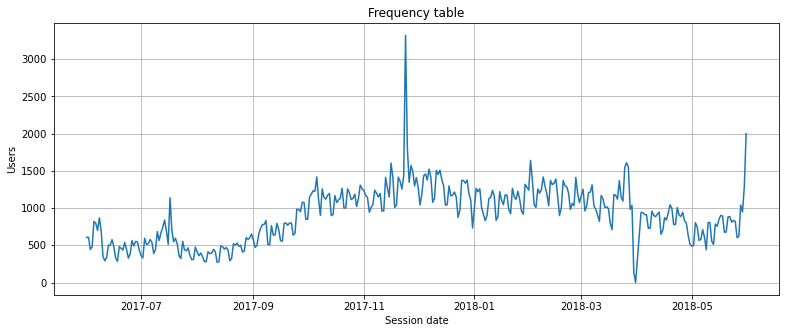

In [30]:
#prepare the dataset
df = dau_total['uid'].reset_index()
#plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df, x="session_date", y="uid"));
ax.set(xlabel="Session date", ylabel="Users", title='Frequency table');

The graph shows the increase in the number of visits since the beginning of the period. We see a sharp jump in visits to the service in December 2017, and a return to the average level until April 2018. In April, the graph shows a drop in traffic, which may be due to changes in Yandex.Direct: in mid-April, the company switched to a new advertising management logic. This negatively affected the number of visits. We see a significant decrease up to the end of May 2018.<br>
At the end of the period under review, a surge in visits is seen, but we do not have sufficient data to draw conclusions on it.

Let's see what devices were used to login to the service during the period under review.

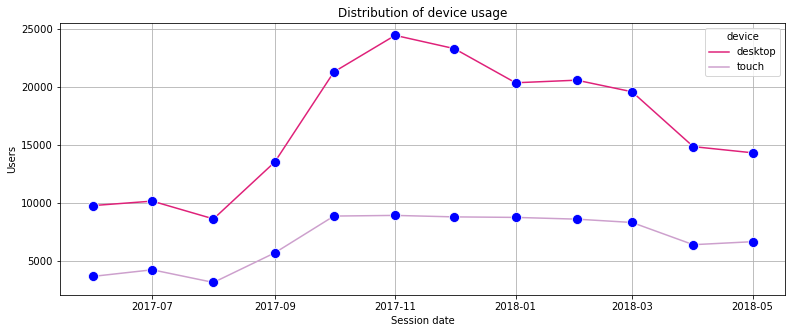

In [31]:
#group by device
df= df_visits.groupby(['session_month','device']).agg({'uid': 'nunique'}).reset_index()

#line plot
plt.figure(figsize=(13,5))
plt.grid(True)
ax = (sns.lineplot(data=df, x="session_month", y="uid", hue="device", palette='PuRd_r',
              marker='o', markerfacecolor='blue', markersize=10));
ax.set(xlabel="Session date", ylabel="Users", title='Distribution of device usage');

In [32]:
print("Monthly active users (MAU) by desktop      :",int(df[df['device']=='desktop']['uid'].mean()))
print("Monthly active users (MAU) by mobile device:",int(df[df['device']=='touch']['uid'].mean()))

Monthly active users (MAU) by desktop      : 16724
Monthly active users (MAU) by mobile device: 6825


The graph shows that until September 2017, the number of entries from desktop and mobile applications was proportional. Since September, the number of desktop visits has increased. Then, from January 2018, it returned to the same proportion.

It is noteworthy that there was no jump in visits from mobile devices during the New Year holidays, as from desktops.

- **How many sessions are there per day?**

A user session is a specified period of time that a user with a unique IP address spends on a site or in a mobile application, starting from opening the application and ending with its closing. The number of sessions per user is a good indicator of how often the application is being used.

In [33]:
def session_count(field_name):
    #this function count an average number of user sessions for the specified period
    sessions_per_user = df_visits.groupby(field_name).agg({'uid': ['count','nunique']})
    sessions_per_user.columns = ['n_sessions', 'n_users']
    sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
    return round(sessions_per_user.sessions_per_user.mean(),2)

#per day
print('Mean of sessions per day  :', session_count('session_date'))
#per month
print('Mean of sessions per month:', session_count('session_month'))

Mean of sessions per day  : 1.08
Mean of sessions per month: 1.28


On average, users do not visit the service site more than once a day or even a month. <br>
This means that in the period under review we have a distribution of the number of sessions similar to the distribution of the number of unique users of the service.

Let's see the number of user sessions divided by advertising channel.

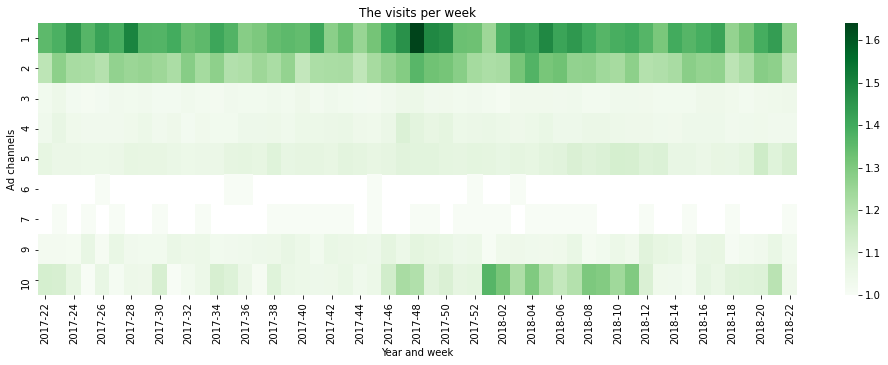

In [34]:
#group by weeks
sessions_per_user = df_visits.groupby(['source_id','session_y_w']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user.reset_index(inplace=True)
#dataset for plotting
df= pd.pivot_table(sessions_per_user, 
                   index='source_id', columns='session_y_w', values='sessions_per_user', aggfunc='first') 
#heatmap
fig, ax = plt.subplots(figsize= (17, 5))
sns.heatmap(df, cmap="Greens", xticklabels=2).set_title("The visits per week");
plt.xticks(rotation='vertical')
ax.set_ylabel('Ad channels');    
ax.set_xlabel('Year and week');

The graph shows that the same users have no more than 1.5 sessions per week. However, it is worth noting that users who came from advertising channels 1, 2, and 10 tend to return to the service platform.

Since users use the same advertising channels from different devices, it is useful to see how advertising channels are distributed to them.

In [35]:
#dataset of distribution of advertising channels on devices
df = df_visits.groupby(['device','source_id']).agg({'uid':'count'}).reset_index()
#desktop
shape_desktop= df[df['device']=='desktop']['uid'].sum()
#mobile device
shape_touch= df[df['device']=='touch']['uid'].sum()
#percentage of total visits through a specific device
df['ratio'] =  df.apply(lambda x: x[2]/shape_desktop*100 if x[0]=='desktop' else x[2]/shape_touch*100
                        ,axis=1)

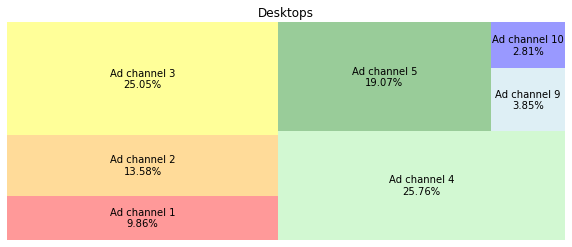

In [36]:
def make_tree(device, alpha, title):
    #tree-map forming function
    colors = ['red','orange','yellow','lightgreen','green','lightblue','blue','purple']
    sizes = df[(df['device']==device)&(df['ratio']>1)]['ratio'].tolist()
    labels = df[(df['device']==device)&(df['ratio']>1)].apply(
        lambda x: 'Ad channel '+str(x[1])+'\n'+str(round(x[3],2))+'%'
        ,axis=1)

    plt.figure(figsize=(10,4))
    plt.axis('off')
    plt.title(title)
    squarify.plot(sizes=sizes, label=labels, alpha=alpha, color=colors);
    plt.show()
    
#plotting graph of desktop   
make_tree('desktop', 0.4, 'Desktops')

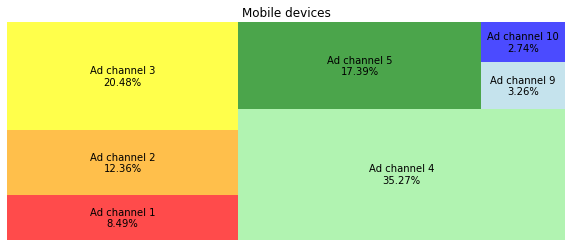

In [37]:
#plotting graph of mobile devices    
make_tree('touch', 0.7, 'Mobile devices')

As we can see, mobile users and desktop users log in through advertising channels in almost the same way. The slight difference in percentage shows that users from the desktop prefer to enter through advertising channels 3 and 4 - in percentage they are almost equal. Mobile users mostly come from channel 4. The percentage of logins from other channels is practically the same. The use of channels 6 and 7 is less than one percent of the total, so they were not included in the sample.

- **What is the length of each session?**

On average, each user visits the Yandex.Afisha service once a month. <br>
It is useful to know how much time the user spends in the service. Let's calculate ASL (Average session length).

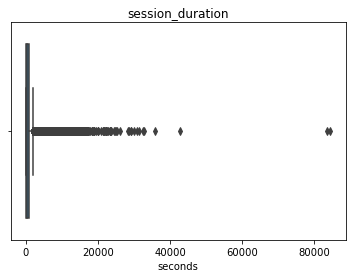

In [38]:
#session duration
df_visits['session_duration']= (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
#distribution
ax = sns.boxplot(x=df_visits['session_duration']).set(title="session_duration", xlabel='seconds');

Obviously we have a skewed data distribution. So let's take the Mode metric.

In [39]:
asl = df_visits['session_duration'].mode()
print('Average session length:',int(df_visits['session_duration'].mode()),'sec')

Average session length: 60 sec


The truth is, ideal average for time on page will vary. Some marketers state that a reasonable benchmark for average session duration is between 2-3 minutes. A good average session duration, then, might be anything above three minutes.<br>
ASL shows 1 minute. This is very small. Even if the user comes to the service only for payment, this means that he does not delay to watch other content. Let's check our metric.

An interquartile range shows where the bulk of the values lie. Let's look at these values.<br>
Next, we will operate with duration in minutes.

In [40]:
(df_visits['session_duration']/60).describe()

count    359400.000000
mean         10.725108
std          16.938913
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: session_duration, dtype: float64

Mean and Median are very different, hence the distribution is twisted and it is better to take the Median. The Median is 5 minutes, which is more like a reliable result for such a large service as Yandex.Afisha.

We will also look at user sessions in terms of advertising channels and login devices. We'll also take the median, keeping in mind the data distribution that we saw in the data pre-processing.

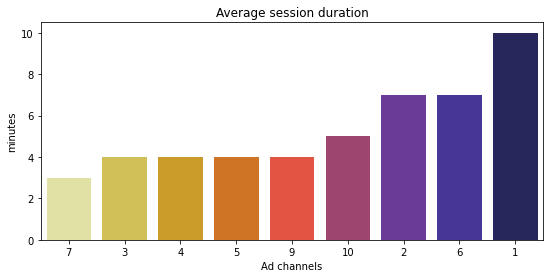

In [41]:
#dataset of distribution of the average user session duration by ad source
df= (df_visits.groupby('source_id').agg({'session_duration':'median'})/60).reset_index()
df= df.sort_values('session_duration')
#barplot
plt.figure(figsize=(9,4))
sns.barplot(x=df.source_id, y=df.session_duration, order=df.source_id, palette="CMRmap_r"
           ).set(title='Average session duration', xlabel='Ad channels', ylabel='minutes');

The minimum value is 3 minutes. On the most popular sources 3 and 4, the average session value is 4 minutes. Ad channel 1 shows even 10 minutes and it can be outlier.

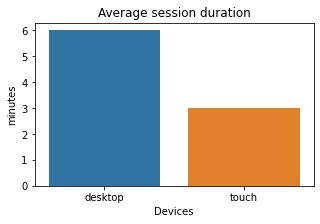

In [42]:
#dataset of distribution of the average user session duration by devices
df= (df_visits.groupby('device').agg({'session_duration':'median'})/60).reset_index()
#barplot
plt.figure(figsize=(5,3))
sns.barplot(x=df.device, y=df.session_duration
           ).set(title='Average session duration', xlabel='Devices', ylabel='minutes');

In the distribution by devices used, we see the average session time from 3 to 6 minutes. Users not only visit the service platform more often from their desktops, but also spend more time on the service from it.<br>
In general, for our task, the average session time will be consider 4 minutes.

- **How often do users come back?**

We can evaluate user's interest, loyalty and degree of engagement by using a number of metrics and Sticky Factor is one of them. We can use this metric to evaluate how stable our user base is and how regular they come in. We usually calculate it as a number of Daily unique Users divided in a number of Monthly unique Users.

In [43]:
sticky_mau = dau_total_mean / mau_total_mean
print("Sticky Factor by MAU (total): {:.2%}".format(sticky_mau))

Sticky Factor by MAU (total): 3.91%


The metric across the service shows little value. Let's take a closer look.

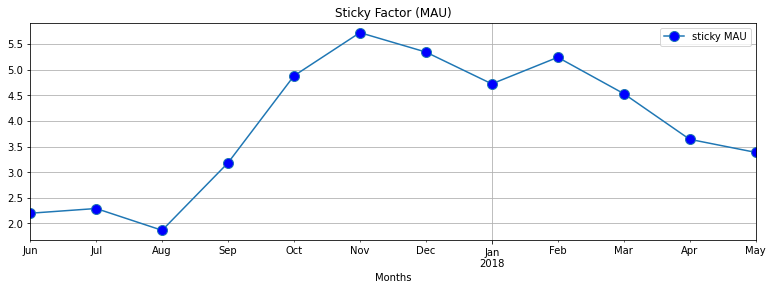

In [44]:
#distribution of the factor by months
dau_total.reset_index(inplace=True)
dau_total['session_month']= dau_total['session_date'].astype('datetime64[M]')

dau_per_month = dau_total.groupby('session_month').agg({'uid':'mean'})
dau_per_month.columns = ['sticky MAU']

#sticky factor
sticky_mau = dau_per_month / mau_total_mean * 100
sticky_mau.plot(figsize=(13,4), grid=True, marker='o', markerfacecolor='blue', markersize=10
               ).set(title='Sticky Factor (MAU)', xlabel='Months');

We have already seen above that the bulk of users are new clients who make 1-2 sessions per month. Let's see how fast the second session goes. We will use sticky metric by week.

In [45]:
sticky_wau = dau_total_mean / wau_total_mean
print("Sticky Factor by WAU (total): {:.2%}".format(sticky_wau))

Sticky Factor by WAU (total): 15.88%


Sticky Factor around 18% is considered to be good for services like Yandex.Afisha. The resulting value is not high enough. The resulting value is not high enough. It is interesting to look at the ratio of the number of active users per week to the total average number of users per week during the entire period under consideration.

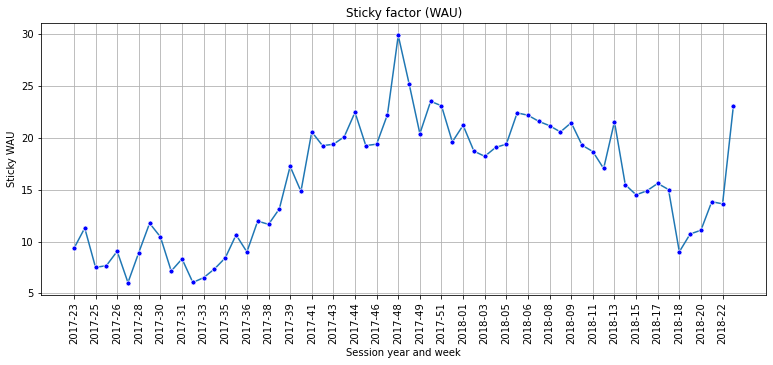

In [46]:
#group by week
#dau_total['session_week']= dau_total['session_date'].dt.week
dau_total['session_week']= dau_total['session_date'].dt.isocalendar().week
dau_in_week = dau_total.groupby(['session_month','session_week']).agg({'uid':'mean'})
dau_in_week.reset_index(inplace=True)

#label x-axis
dau_in_week['session_y_w'] = dau_in_week.apply(lambda x: x[0].strftime('%Y')+'-'+str(x[1]).zfill(2), axis=1
                                              ).astype('category')

#active users to the total average number of users per week 
dau_in_week['uid'] = dau_in_week['uid'] / wau_total_mean * 100

#distribution by period
plt.figure(figsize=(13,5));
plt.grid(True);
#plt.xticks(rotation='vertical');

xn = range(len(dau_in_week['session_y_w']))
ax = sns.lineplot(data=dau_in_week, x=xn, y="uid",
                  marker='o', markerfacecolor='blue', markersize=5
                 ).set(xlabel="Session year and week", ylabel="Sticky WAU", title='Sticky factor (WAU)');
plt.xticks(np.arange(min(xn), max(xn)+1, 2), dau_in_week['session_y_w'][1:62:2], rotation='vertical');

The Sticky factor calculation does not take into account many of the nuances of user behavior, but at the same time remains one of the important metrics. It shows you not only how long the average user stays with service, but when exactly service lose the most number of users. In our case, this is week 17 of 2018 (from Apr. 23, 2018 to Apr. 29, 2018)

Attracting new customers is much more expensive than "reactivating" existing, but temporarily inactive. This is why it is important to monitor customer retention rates. It shows the percentage of users who return to the service after a certain amount of time after one visit.<br>
Let's calculate it.

In [47]:
#the date and month of the first visit
first_visit = df_visits.groupby('uid')['session_date'].min() 
first_visit.name = 'first_visit_dt'
df_visits = df_visits.join(first_visit, on='uid')
df_visits['first_visit_month'] = df_visits['first_visit_dt'].astype('datetime64[M]')

#the number of days that the user remains active, i.e. comes back and performs some action
df_visits['active_days'] = df_visits['session_date'] - df_visits['first_visit_dt']

We will use cohort analysis and calculate retention 1 day, 3 days, 7 days, 14 days, 30 days and retention 3 months. This is one of the standards used in the online industry and retail, and it will allow us to see the dynamics.

In [48]:
def cohort_activity(groupby_field, num_active_days):
    #this function determines what type of retained users are assigned
    df = (df_visits[(df_visits['active_days'].dt.days > num_active_days)].
          groupby(groupby_field).agg({'uid':'nunique'}))
    #rename column    
    period_name = 'Retention '+ str(num_active_days+1) +'d'
    df.rename(columns={'uid':period_name}, inplace=True)
    return df

In [49]:
def cohort_table(cohorts_field):
    #this function collects retention table by cohorts
    #the first column - total users
    cohorts = df_visits.groupby(cohorts_field).agg({'uid':'nunique'}).copy()
    cohorts.rename(columns={'uid':'Total users'}, inplace=True)
    
    #user groups by the number of days of retention.
    num_days = [0, 2, 6, 13, 29, 89]
    for i in num_days:
        cohorts = cohorts.join(cohort_activity(cohorts_field, i))
    
    cohorts = cohorts.apply(lambda x: x / cohorts['Total users'] ) 
    return cohorts

We build cohorts by the date of the first visit.

In [50]:
#cohort table
user_retention = cohort_table('first_visit_month')

Let's visualize the result.

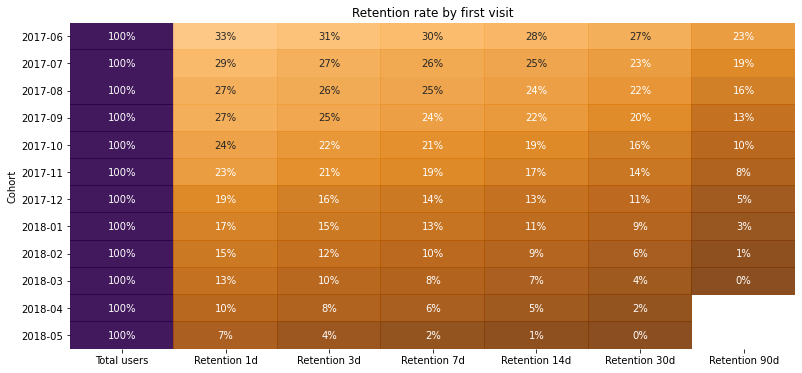

In [51]:
#heatmap
yticklabels = user_retention.index.values.astype('datetime64[M]').astype('str')
plt.figure(figsize=(13, 6))
sns.heatmap(user_retention[['Total users','Retention 1d','Retention 3d','Retention 7d','Retention 14d',
                            'Retention 30d','Retention 90d']]
            , annot=True, cbar=False, fmt='.00%', yticklabels=yticklabels, cmap='PuOr', alpha=0.9
           ).set(ylabel="Cohort", title='Retention rate by first visit');

We see that the most loyal users are in the first cohort. Based on the general picture, we can say that service users since 2017 are the most stable and return more often.

Let's consider the cohorts in terms of the use of advertising channels.

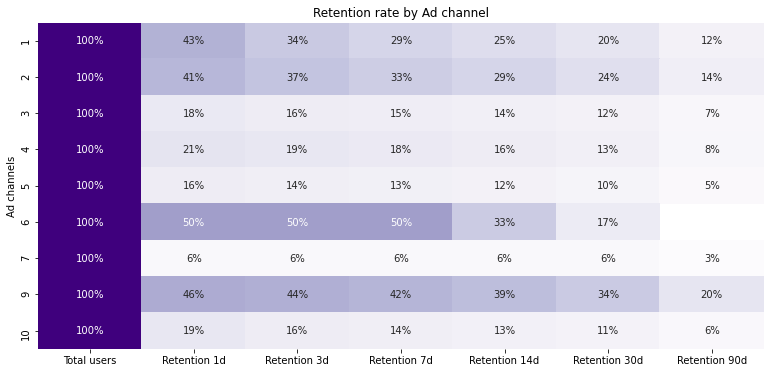

In [52]:
#cohort table
user_retention = cohort_table('source_id')
#heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(user_retention[['Total users','Retention 1d','Retention 3d','Retention 7d','Retention 14d',
                             'Retention 30d','Retention 90d']]
            , annot=True, cbar=False, fmt='.00%', cmap='Purples'
           ).set(ylabel="Ad channels", title='Retention rate by Ad channel');

While ad channels 3, 4, and 5 bring in the most visits to the service platform, channels with less traffic show better user retention.

In [53]:
print('Average lifetime of a user on a service platform:', round(df_visits['active_days'].dt.days.mean()),'days')

Average lifetime of a user on a service platform: 30 days


And let's see the average number of visits using cohorts by the date of the first visit.

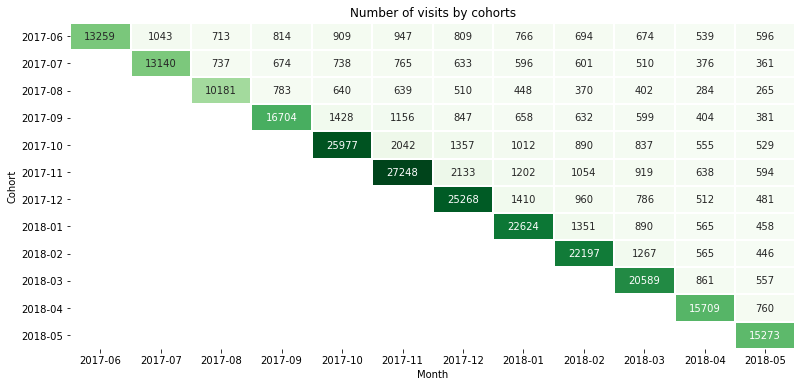

In [54]:
#pivot table
output = df_visits.pivot_table(index='first_visit_month', columns='session_month', 
                            values='uid', aggfunc='nunique')
#result visualization
yticklabels=output.index.values.astype('datetime64[M]')
xticklabels=output.columns.values.astype('datetime64[M]')
fig, ax = plt.subplots(figsize= (13, 6))
#heatmap
sns.heatmap(output, annot=True, cbar=False, xticklabels=xticklabels, yticklabels=yticklabels, 
            fmt='g', linewidth = 1, cmap='Greens'
           ).set(title = "Number of visits by cohorts", ylabel='Cohort', xlabel='Month');

From each cohort, the approximate number of visitors each month (excluding the first) is 500-600.<br>
Taking into account the first month:

In [55]:
#Average number of visits by cohorts
output.T.mean().round(2)

first_visit_month
2017-06-01     1813.58
2017-07-01     1739.18
2017-08-01     1452.20
2017-09-01     2534.33
2017-10-01     4149.88
2017-11-01     4826.86
2017-12-01     4902.83
2018-01-01     5177.60
2018-02-01     6118.75
2018-03-01     7335.67
2018-04-01     8234.50
2018-05-01    15273.00
dtype: float64

The average number of visits by cohorts can be taken as the value for the first cohort, as for the most mature.

### Conclusion

According to Forbes magazine, the probability that you will sell a product or service to a new customer is 5-20%, while the probability of selling it to an existing customer is about 60-70%. Of course, Yandex.Afisha is only an intermediary in the sale. However, the service is also interested in the user not only entering the service, but also making a purchase.

In summary, we can say the following:
- on average, about 1000 users visit the service per day.
- the bulk of users are users with a unique id
- basically, users log in once a month.
- average session length is 4 minutes
- users visit the service more often from the desktop version of the site
- in percentage terms, the use of advertising channels from mobile devices and desktop is the same.
- Sticky factor is below average
- Retation rate shows low user engagement in 2018 and high user engagement in 2017
- Average lifetime of a user on a service platform: 30 days
- Average number of visits by cohorts - 1814

In general, the service has seen a noticeable drop in performance since April 2018.

## 2. Sales <a class="anchor" id="Sales"></a>
[Go back to the Contents](#contents)

These metrics are used to analyze performance and to highlight where performance needs to be improved.

- **When do people start buying?**

Users come from different channels. At what point can we assume that they are using the Yandex.Afisha service?
From the moment when the customer uses the product for its intended purpose, namely, makes a purchase.

The Conversion Rate (CR) refers to the percentage of users who complete the desired actions that benefit a business. Let's calculate it.

In [56]:
#date of first order
df_orders_min_dt= df_orders.groupby('uid').agg({'buy_ts':'min'})
#date of first visit
df_visits_min_dt= df_visits.groupby(['uid','first_visit_dt']).agg({'source_id':'first'}).reset_index()

#cohorts by advertising channels
df_total_users= df_visits_min_dt.groupby('source_id').agg({'uid':'count'})

#number of days between first visit and first purchase
df_visit_order= df_visits_min_dt.merge(df_orders_min_dt, on='uid')
df_visit_order['diff']= (df_visit_order['buy_ts'] - df_visit_order['first_visit_dt']).astype('timedelta64[D]')

#relative values
conversion= df_visit_order.groupby(['source_id','diff']).agg({'uid':'count'}).reset_index()

def conversion_mark(row):
    #the function returns the label of the conversion period
    label= np.NaN
    if row['diff'] == 0:
        label='0d'
    elif row['diff'] <= 1:
        label='1d'
    elif row['diff'] <= 3:
        label='3d'
    elif row['diff'] <= 7:
        label='7d'
    elif row['diff'] <= 14:
        label='14d'
    elif row['diff'] <= 30:
        label='30d'
    return label

#labels
conversion["Conversion days"] = conversion.apply(conversion_mark, axis=1)

In [57]:
#dataset for plotting
df1 = pd.pivot_table(conversion, index='source_id', columns='Conversion days', values='uid', 
               aggfunc='sum')
df1 = df1.merge(df_total_users, on='source_id', how='left') 

#conversion rate
df1 = df1.apply(lambda x: x / df1['uid'])

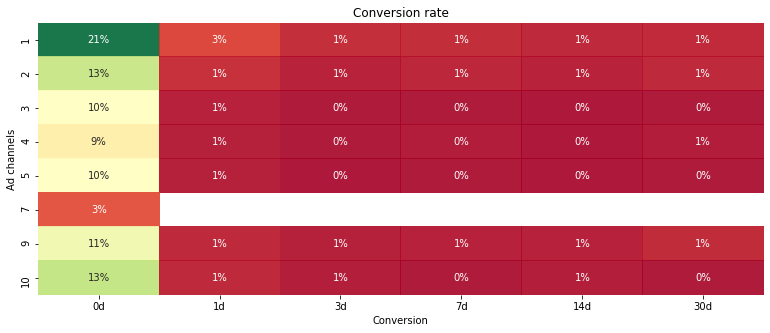

In [58]:
#define the sorter
sorter = ['0d','1d','3d','7d','14d','30d']
#plotting
fig, ax = plt.subplots(figsize= (13, 5))
sns.heatmap(df1.loc[:,sorter], annot=True, cbar=False, fmt='.00%', cmap='RdYlGn', alpha=0.9
           ).set(title="Conversion rate", ylabel='Ad channels', xlabel='Conversion');

We see that user behavior is characterized by purchases on the day they visit the service. The most productive advertising channel with label 1 - it has not only the highest conversion on day 0, but also 3% conversion on day 1.
Advertising channels 2 and 9 show a stable conversion of 1% on all days in question. But we know that a small number of users enter through channel 9, so it will not be considered as profitable. We can also ignore channels 6 and 7 for profitability.

But what is a good conversion rate? Across industries, the average landing page conversion rate was 2.35%, yet the top 25% are converting at 5.31% or higher. Ideally, you want to break into the top 10% — these are the landing pages with conversion rates of 11.45% or higher.<br>
In our dataset, conversion rates by significant sources range from 9% to 21%.

If we know that the first purchase was made on the same day of visit, then it will be interesting to see this data by month and compare with marketing costs in the same period.

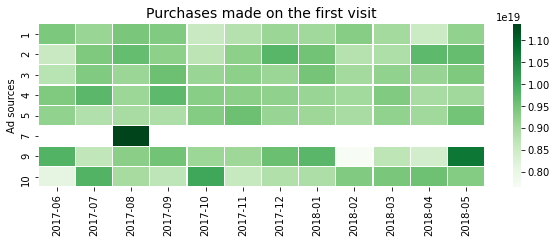

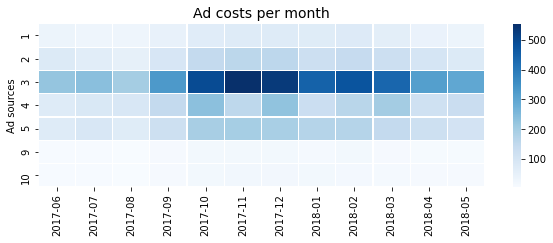

In [59]:
#users who made a purchase on the day of the first visit to the service
buyer_0d_by_month = df_visit_order[df_visit_order['diff'] == 0].copy()
buyer_0d_by_month['buy_month'] = buyer_0d_by_month['buy_ts'].astype('datetime64[M]')

#dataset for plotting
buyer_heatmap = pd.pivot_table(buyer_0d_by_month, index=['source_id'], columns=['buy_month']
                   , values=['uid'], aggfunc='mean')
#plotting
fig, ax = plt.subplots(figsize= (10, 3))
xticklabels= buyer_heatmap.columns.get_level_values('buy_month').values.astype('datetime64[M]')
sns.heatmap(buyer_heatmap, cmap="Greens", linewidths=.1, 
            xticklabels=xticklabels).set_title("Purchases made on the first visit", size=14);
ax.set_ylabel('Ad sources');    
ax.set_xlabel('');

#marketing costs
df_costs['cost_month'] = df_costs['cost_dt'].astype('datetime64[M]')
#dataset for plotting
df_count_costs= pd.pivot_table(df_costs, index='source_id', columns='cost_month', values='cost'
                   , aggfunc='median', fill_value=0)                   
#plotting
fig, ax = plt.subplots(figsize= (10, 3))
xticklabels= df_count_costs.columns.get_level_values('cost_month').values.astype('datetime64[M]')
sns.heatmap(df_count_costs, cmap="Blues", linewidths=.1, 
            xticklabels=xticklabels).set_title("Ad costs per month", size=14);
ax.set_ylabel('Ad sources');    
ax.set_xlabel('');

As we can see, the relationship between the cost of marketing campaigns and first purchases does not seem obvious. Marketing campaigns may have had more impact on repeat purchases.

At the same time, the term “customer acquisition channel” usually refers to the channel through which the customer came, i.e. in our case made the first purchase. This works well for subscription services such as SaaS.

But in e-commerce, things are different. If we attribute the second and subsequent purchases to the same channel through which the client came, then we will be greatly mistaken in the conclusions. After all, one channel can work better for attraction, and the other - for repeat sales, i.e. retention.

- **How many orders do they make during a given period of time?**

Let's see how purchases were distributed over the period under review.

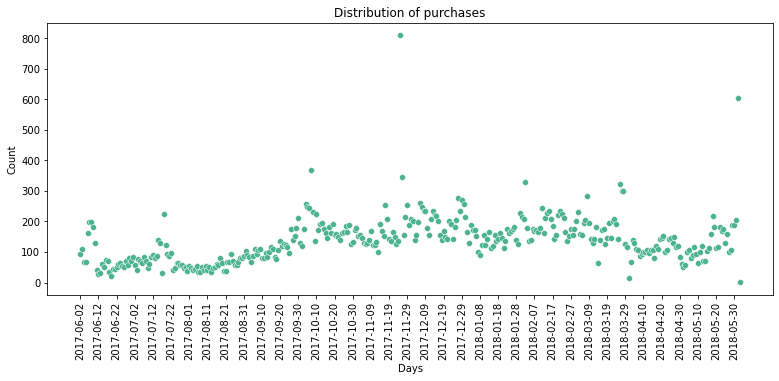

In [60]:
#short day type
df_orders['purchase_day'] = df_orders['buy_ts'].astype('datetime64[D]')
#dataset of purchases
df = df_orders.groupby('purchase_day').agg({'uid':'count'}).reset_index()
#plotting
plt.figure(figsize=(13,5))
xn= range(len(df["purchase_day"]))
sns.scatterplot(data=df, x=xn, y="uid", color="#4CB391"
               ).set(title='Distribution of purchases', xlabel='Days', ylabel='Count');
#x ticks
plt.xticks(np.arange(min(xn), max(xn)+1, 10), df["purchase_day"].astype('str')[1:364:10]
           , rotation='vertical');

Linear chart of the number of orders of unique users by months.<br>
For comparison, let's add a graph of the number of Daily Active Users.

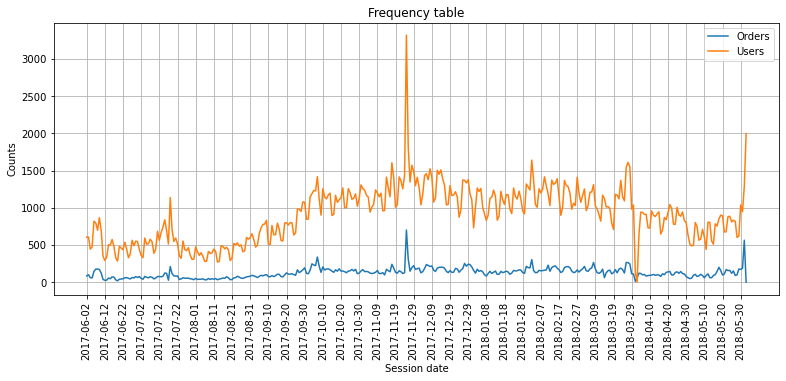

In [61]:
#the number of purchases made by a unique user per day
df = df_orders.groupby('purchase_day').agg({'uid':'nunique'}).reset_index()

#plot
plt.figure(figsize=(13,5))
plt.grid(True)

xn= range(df.shape[0])
ax = (sns.lineplot(data=df, x=xn, y="uid"));
ax.set(xlabel="Session date", ylabel="Counts", title='Frequency table');
#x ticks
plt.xticks(np.arange(min(xn), max(xn)+1, 10), df["purchase_day"].astype('str')[1:df.shape[0]:10]
           , rotation='vertical');

#number of unique users per day
df4 = dau_total[['session_date','uid']]
#plot
xn= range(df4.shape[0])
ax2 = (sns.lineplot(data=df4, x=xn, y="uid"));
ax.legend(['Orders', 'Users']);

The data distribution is almost the same. Which is understandable - if a user enters the service platform, makes a purchase, and rarely returns, then the service works only for new users.

Let's calculate the ratio of the number of purchases to the number of visits.

In [62]:
df_count_visits = df_visits.groupby('uid').agg({'uid':'count'})
df_count_visits.rename(columns={'uid':'visits'}, inplace=True)

df_count_orders = df_orders.groupby('uid').agg({'uid':'count'})
df_count_orders.rename(columns={'uid':'orders'}, inplace=True)

df_temp = df_count_orders.merge(df_count_visits, on = 'uid')

print('visits:', df_temp['visits'].mean())
print('orders:', df_temp['orders'].mean())
print('Ratio :', (df_temp['orders']/df_temp['visits']).mean())

visits: 2.6636525551445405
orders: 1.376928346348815
Ratio : 0.7733014241000435


On average, users who make purchases visit the service 2.66 times to make 1.38 purchases. In fact, purchases are made by those who visit the service more often.

Let's do a cohort analysis of the average number of purchases per customer by month of lifespan.

In [63]:
#prepare a dataset
#date of first purchase
first_purchase_dates = df_orders.groupby('uid')['buy_ts'].min()
first_purchase_dates.name = 'first_purchase_dt'
#dataset of purchases
purchases = df_orders.join(first_purchase_dates,on='uid')
purchases['purchase_month'] = purchases['buy_ts'].astype('datetime64[M]')
purchases['first_purchase_month'] = purchases['first_purchase_dt'].astype('datetime64[M]')

#how many buyers are there every month
#cohort are users who made a purchase in the same month
purchases_grouped = (purchases.groupby(['first_purchase_month','purchase_month']).
                     agg({'purchase_month':'count','uid':'nunique'}) )
purchases_grouped.columns = ['total_orders','uid']
#number of purchases per user
purchases_grouped['purchases_per_user'] = purchases_grouped['total_orders']/purchases_grouped['uid']
purchases_grouped = purchases_grouped.reset_index()

#cohort lifetime
purchases_grouped['cohort_lifetime'] = ((purchases_grouped['purchase_month'] - 
                                                   purchases_grouped['first_purchase_month'])/
                                                   np.timedelta64( 1, 'M'))
purchases_grouped['cohort_lifetime'] = (purchases_grouped['cohort_lifetime'].round().astype('int'))

#group by lifetime month
lifetime_pivot = (purchases_grouped.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='purchases_per_user',
    aggfunc='mean') )

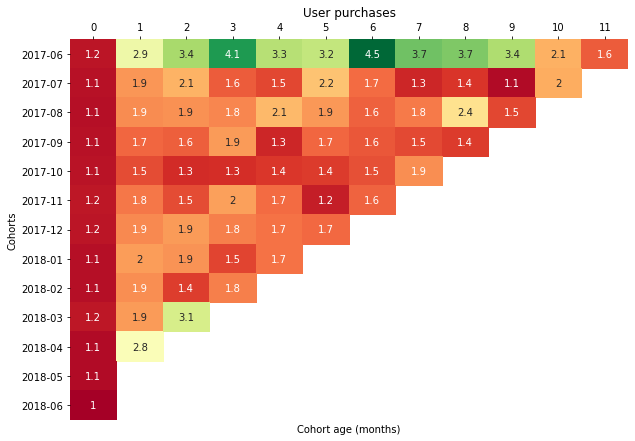

In [64]:
#result visualization
yticklabels=lifetime_pivot.index.values.astype('datetime64[M]').astype('str')
fig, ax = plt.subplots(figsize= (10, 7))
#heatmap
sns.heatmap(lifetime_pivot, annot=True, cbar=False, yticklabels=yticklabels, cmap='RdYlGn'
           ).set(title="User purchases", ylabel='Cohorts', xlabel='Cohort age (months)');
ax.xaxis.tick_top() # x axis on top

The most profitable cohort is the one that remains loyal to the service for a long time.<br>
We also see that returning users increase the number of purchases they make.

- **What is the average purchase size?**

The distribution graph of data on the value of purchases is strongly twisted to the right and has significant outliers. Therefore, we cannot take the average over the entire period and take the median over the sample in which most values fall.

In [65]:
#average revenue
print('Average price in an order:', round(df_orders[df_orders['revenue']<60]['revenue'].median(),2))

Average price in an order: 2.44


For the analysis of such data, it is important to consider the distribution. Let's plot the average revenue values by day.

In [66]:
#dataset
df= df_orders.groupby('purchase_day').agg({'revenue':'mean'}).reset_index()

# a histplot graph is from a new version of seaborn library
#ax = sns.histplot(data=df, x="purchase_day", y="revenue", cbar=True
#                 ).set(title='Distribution of the average revenue values', ylabel='Revenue'
#                       , xlabel='Year - Months') ;

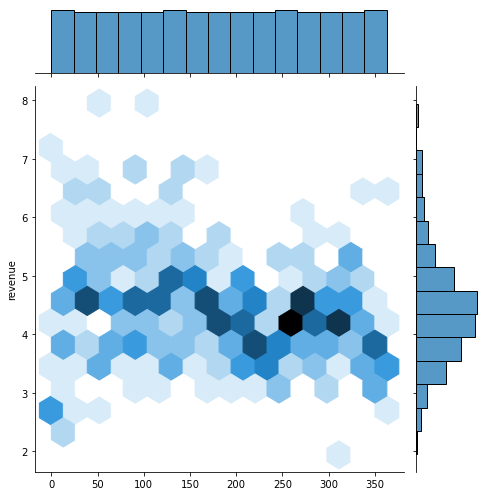

In [67]:
#plotting
xn= range(df.shape[0])
sns.jointplot(data=df, x=xn, y="revenue", kind='hex', height=7, marginal_kws=dict(bins=15) );

The distribution shows that up to the middle of the period under review, the spread in revenue values was quite high - from 2.2 to 7, most often the average revenue from purchases ranged from 4.5 to 5. After that, there was practically no revenue above 5, and the average revenue fell by values from 3.5 to 4.5, although it can be seen that the number of purchases has increased. By the end of the period, the average revenue is about 3.5.

Let's construct a cohort analysis of the average revenue from a customer by months of the cohort's life.

In [68]:
#cohorts by month of first visit
#unique users by month
df_visit_uniq = df_visits[['first_visit_month','uid']].drop_duplicates()

#purchases by month
df_orders['purchase_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_orders_purchase = df_orders.groupby(['purchase_month','uid']).agg({'revenue':'sum'}).reset_index()

#cohort table first column - user count in cohort 
cohorts_table = df_visit_uniq.groupby('first_visit_month').agg({'uid':'count'})
cohorts_table.columns= ['Total Users']

#add cohorts purchases
cohort_purchase = df_visit_uniq.merge(df_orders_purchase, on='uid', how='right')

#cohort table second column - count of buyers
df_temp= cohort_purchase.groupby('first_visit_month').agg({'uid':'nunique'})
df_temp.columns= ['Total Buyers (%)']
cohorts_table = cohorts_table.merge(df_temp, left_index=True, right_index=True, how='left')
cohorts_table['Total Buyers (%)']= round(cohorts_table['Total Buyers (%)']/cohorts_table['Total Users']*100,1)

#mean revenue by month
cohorts_revenue = cohort_purchase.groupby(['first_visit_month','purchase_month']).agg({'revenue':'mean'})

We visualize the cohorts as a pivot table.

In [69]:
#prepare a dataset
df_temp= cohorts_revenue['revenue'].unstack(1).iloc[:, 0:12]
df_temp.columns = df_temp.columns.astype('str')
df_temp.columns = [x[0:7] for x in df_temp.columns.values]
cohorts_table = cohorts_table.merge(df_temp, left_index=True, right_index=True, how='left')
cohorts_table.index.name = 'Cohorts'
#show pivot table
print('The average purchase size')
round(cohorts_table,1).fillna('')

The average purchase size


,Total Users,Total Buyers (%),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
Cohorts,,,,,,,,,,,,,,
2017-06-01,13259,22.0,4.4,10.7,11.4,16.7,12.9,12.7,15.1,11.6,13.5,17.2,12.8,8.5
2017-07-01,13140,18.7,,5.6,7.8,7.5,6.4,5.5,6,4.8,6,6.3,8.2,6.2
2017-08-01,10181,16.9,,,5.2,6.4,7.3,8.2,7.9,7,6.4,12,6.8,6.5
2017-09-01,16704,18.3,,,,4.9,8.5,8.8,13.2,7.8,9.5,6.1,7.1,4.5
2017-10-01,25977,18.0,,,,,4.8,6.1,4.5,4.8,5.3,5.8,5,5.3
2017-11-01,27248,15.6,,,,,,4.7,4.8,5.1,7.5,5.5,6.5,5.4
2017-12-01,25268,16.1,,,,,,,4.5,4.9,5.4,6.1,5.9,5.7
2018-01-01,22624,13.8,,,,,,,,4,6.1,6.7,3.9,4.6
2018-02-01,22197,14.4,,,,,,,,,4,7.1,5.4,5.8


The table shows that the cohorts have 12 to 22 percent of buyers. The number of visits increased significantly by the end of 2017, but the percentage of recipients also decreased markedly and remained low until the end of the period under review.<br>
The average purchase price during the life of the cohort does not fall below the initial one and remains approximately at the same level.

In [70]:
print('Purchases were made on average for ', round(cohort_purchase['revenue'].mean(),2))

Purchases were made on average for  5.37


There are several salient features of cohort behavior:
- if from the beginning of the life of a cohort the average purchase price is equal to or higher than the average for the entire sample, then it can be expected that purchases for this cohort will continue to exceed the average level.
- also during the life of the cohort, if the amount for purchases increases, then an increase in the amount of purchases can be expected in the future.

- **How much money do they bring?**

LTV is the customer's lifetime value. This is the total amount of money that a customer, on average, brings to the company by making purchases. When calculating LTV, analysts usually take into account the gross profit from the client for the period.

Cohort analysis calculates the average income from the entire user group in the cohort.<br>
Let's collect cohorts by the date of the first order.

In [71]:
#month of the first purchase of each user
first_orders = df_orders.groupby('uid').agg({'purchase_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
all_orders = df_orders.merge(first_orders, on='uid')

#the number of unique users for each cohort
cohort_sizes = first_orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#cohorts

#grouping by month of first purchase and month of purchase
cohorts = all_orders.groupby(['first_order_month','purchase_month']).agg({'revenue': 'sum'}).reset_index()

#number of users who made their first purchases for each month
report = cohort_sizes.merge(cohorts, on='first_order_month')

In [72]:
#While gross margins vary widely by product and industry, a survey of ecommerce companies by Marketing Sherpa 
#found the average gross margin of products is 30% for smaller online stores and 37% for larger ecommerce 
#businesses.
#We do not know gross margins for Yandex.Afisha.
#But this service is big business, so let's take gross margin = 0.37
#margin_rate = 0.37

According to <a href="https://www.macrotrends.net/stocks/charts/YNDX/yandex/gross-margin">official data</a>, a gross margin of Yandex was 74.3% in late 2017 - early 2018.

In [73]:
gross_margin_rate = 0.743

#LTV is calculated based on gross profit, not income,
#we need to find gross profit by multiplying revenue by profitability
report['gp'] = report['revenue'] * gross_margin_rate

In [74]:
#LTV is a relative measure and is easier to study for mature cohorts.
#so let's make the columns show the age of the cohort
report['Cohort age'] = (report['purchase_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['Cohort age'] = report['Cohort age'].round().astype('int')

#LTV 
#the gross profit of the cohort for each month divided by the total number of users in each cohort
report['ltv'] = report['gp'] / report['n_buyers']

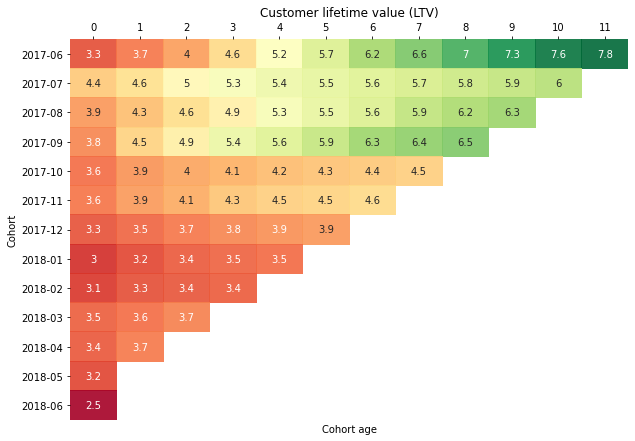

In [75]:
#pivot table
output = report.pivot_table(index='first_order_month', columns='Cohort age', 
                            values='ltv', aggfunc='mean').round(2)
#the cumulative sum 
output= output.cumsum(axis=1).round(2)
#result visualization
yticklabels=output.index.values.astype('datetime64[M]').astype('str')
fig, ax = plt.subplots(figsize= (10, 7))
#heatmap
sns.heatmap(output, annot=True, cbar=False, yticklabels=yticklabels, cmap='RdYlGn', alpha=0.9
           ).set(title = "Customer lifetime value (LTV)", ylabel='Cohort');
ax.xaxis.tick_top() # x axis on top

LTV of the most mature cohort will show us the desired value

In [76]:
#the most mature cohort
ltv_201706 = output.loc['2017-06-01'][11]
print('LTV:',ltv_201706)

LTV: 7.78


On average, each client from the first cohort brought in an income equal to 7.78 in a year of activity.

The customer lifetime value (LTV or CLV) is the total profit that we receive from the customer in the course of his cooperation with us. This metric helps predict future earnings and measure long-term business success. Moreover, it helps to estimate how much you need to invest in order to retain a client.

### Conclusion
In summary, we can say the following:
- users buy on the same day they came to the service
- advertising channel with label 1 shows 21% profit, 2 has 13% and stable 1% during the period under review
- no obvious link between purchases and sale costs
- the connection between the number of visits and the number of purchases is obvious
- users who come back for a visit are more likely to make a purchase
- if a cohort starts with high spending on purchases or these expenses increase during the life of the cohort, then this behavior of the cohort can be expected to continue.
- the customer lifetime value is 7.78

## 3. Marketing <a class="anchor" id="Marketing"></a>
[Go back to the Contents](#contents)

After completing an advertising campaign, it is important to understand if it has helped increase metrics and achieve your goals. Let's consider the main aspects of evaluating the effectiveness of an advertising campaign.

- **How much money was spent?**

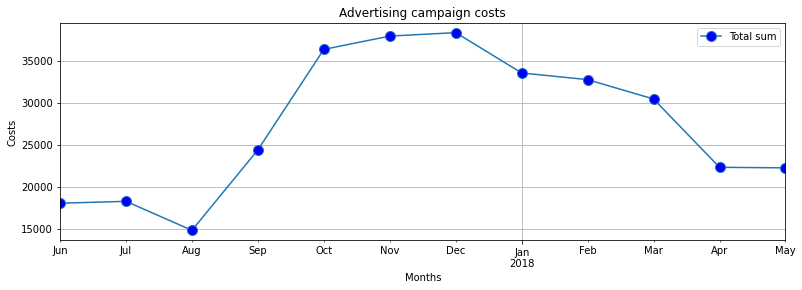

In [77]:
#grouping by advertising campaign costs
df= df_costs.groupby('cost_month').agg({'cost':'sum'})
df.columns=['Total sum']
#line plot
df.plot(figsize=(13,4), grid=True, marker='o', markerfacecolor='blue', markersize=10
               ).set(title='Advertising campaign costs', xlabel='Months', ylabel='Costs');

In [78]:
print('Mean of costs in a month:', round(df['Total sum'].mean(), 2))

Mean of costs in a month: 27427.63


On average, over the period under review, 27428 were spent on advertising campaigns per month.
As we can see, the marketing cost graph is similar to the user visit graph.

Let's see how the costs are distributed as a percentage between advertising channels.

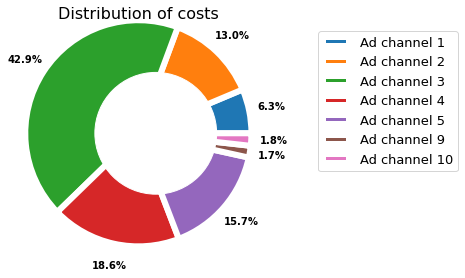

In [79]:
#distribution of costs between advertising channels
df= df_costs.groupby('source_id').agg({'cost':'sum'}).reset_index()
df['source_id'] = 'Ad channel '+df['source_id'].astype('str')
names= df['source_id']

#Pie-chart of costs distribution
plt.title('Distribution of costs', size=16)
ax1= plt.pie(df['cost'], pctdistance=1.2, autopct='%1.1f%%', textprops=dict(weight="bold"),
             radius=1.3, wedgeprops = {'linewidth': 6, 'edgecolor':'white'})
#inner circle
my_circle=plt.Circle((0.2,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(loc='upper right', labels=names, prop={'size': 13}, bbox_to_anchor=(2, 1))
plt.show()

The largest advertising campaigns were directed to channels 3. Advertising channels 2, 4 and 5 received approximately the same amount of money.

- **How much did customer acquisition from each of the sources cost?**

Basically, the CAC can be calculated by simply dividing all the costs spent on acquiring more customers (marketing expenses) by the number of customers acquired in the period the money was spent. 

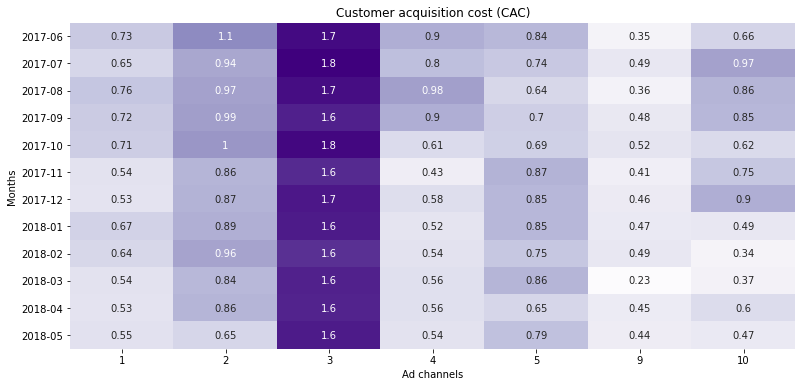

In [80]:
#marketing expenses
total_costs= df_costs.pivot_table(index='source_id', columns='cost_month', values='cost', aggfunc='sum')
#number of users by month
total_visits= df_visits.pivot_table(index='source_id', columns='session_month', values='uid', aggfunc='count')
#CAC
df= (total_costs/total_visits).T.round(2)

#result visualization
yticklabels=df.index.values.astype('datetime64[M]')
fig, ax = plt.subplots(figsize= (13, 6))
#heatmap
sns.heatmap(df.iloc[:,[0,1,2,3,4,7,8]], annot=True, yticklabels=yticklabels, cbar=False, cmap='Purples'
           ).set(title = "Customer acquisition cost (CAC)", xlabel='Ad channels', ylabel='Months');

The highest costs per customer were found on advertising channel 3. Customer acquisition cost for an average is 1.6, while for other channels it does not exceed 1.

*Calculating Cost Per Lead (CPL)*<br>
Metric measures a marketing and sales campaigns' efficiency.

In [81]:
def make_plot(df_temp, field_name, palette, field_date):
    #the function builds a graph according to the specified parameters
    df_temp = df_temp.fillna(0).reset_index()
    print('Mean '+field_name, round(df_temp[field_name].mean(),2) )

    df_temp['Month'] =  df_temp[field_date].astype('datetime64[M]')
    df = round(df_temp.groupby('Month').agg({field_name:'mean'}),2).reset_index()

    #barplot
    plt.figure(figsize=(10,4))
    sns.barplot(x=df['Month'].astype('str'), y=df[field_name], palette=palette
               ).set_title('Calculating Cost Per Lead (CPL)');
    plt.xticks(rotation='vertical');
    return

Mean CPL 0.94


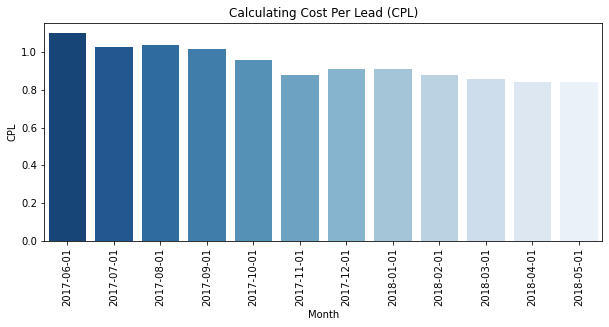

In [82]:
#total visits
df_visit_total = df_visits.groupby('session_date').agg({'uid':'count'})
df_visit_total.columns= ['Total visits']
#total costs
df_costs_total = df_costs.groupby('cost_dt').agg({'cost':'sum'})
df_costs_total.columns= ['Total costs']

#Calculating Cost Per Lead (CPL)
df_CPL = df_visit_total.merge(df_costs_total, left_index=True, right_index=True, how='left')
df_CPL['CPL'] = df_CPL['Total costs']/df_CPL['Total visits']

make_plot(df_CPL, 'CPL', 'Blues_r', 'session_date')

This metric will show if our customer acquisition efforts are staying within budget or if we are spending too much.

This metric will show if our customer acquisition efforts are staying within budget or if we are spending too much.

Another way to get the CAC metric can be considered the cohort analysis, which we performed above to obtain LTV. We have a cohort with a lifespan of a year, so let's calculate the CAC for it.

In [83]:
#getting the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
 
#calculating costs for the cohort month
costs_201706 = df_costs[df_costs['cost_month'] == '2017-06-01']['cost'].sum()
 
#number of buyers
n_buyers_201706 = cohort_201706['n_buyers'][0]
#CAC
cac_201706 = round(costs_201706 / n_buyers_201706, 2)
 
print('Customer acquisition cost (CAC) =', cac_201706)
print('Customer lifetime value   (LTV) =', ltv_201706)

Customer acquisition cost (CAC) = 8.91
Customer lifetime value   (LTV) = 7.78


It cost the company an average of 8.91 to acquire each customer. And a prediction of the net profit attributed to the entire future relationship with a customer is 7.78 So the investment in attracting customers was almost the same.

Let's calculate the CAC for the rest of the cohorts. We first find the total costs for each month, then divide them by the number of clients in each cohort.

In [84]:
#calculating the costs per month
monthly_costs = df_costs.groupby('cost_month').sum()

#add cost data to the report and calculate CAC
report_cac = report.merge(monthly_costs, left_on='first_order_month', right_on='cost_month')
report_cac['CAC'] = report_cac['cost'] / report_cac['n_buyers']

In [85]:
report_cac[['first_order_month','CAC']].drop_duplicates().reset_index(drop=True)

,first_order_month,CAC
0,2017-06-01,8.913904
1,2017-07-01,9.495362
2,2017-08-01,10.803901
3,2017-09-01,9.459981
4,2017-10-01,8.375116
5,2017-11-01,9.295704
6,2017-12-01,8.747797
7,2018-01-01,9.940249
8,2018-02-01,8.960304
9,2018-03-01,8.608907


In [86]:
print('Average value CAC (total):', round(report_cac['CAC'].mean(),2))

Average value CAC (total): 9.33


If LTV is lower than cost of acquisition, then we have few repeat purchases or marketing efforts to retain customers are not paying off. However, this interpretation depends on the industry and the company's profitability.

- **How profitable is the investment? (ROI)**

To differentiate between business return and advertising campaign return, Return on Marketing Investment (ROMI) is calculated instead of Return on Investment (ROI).

Return on Marketing Investment (ROMI) is a metric that is used to measure overall marketing performance. It is calculated as the ratio of revenue from marketing efforts to marketing costs.

We find ROMI by dividing Life-Time Value (LTV) by Customer Acquisition Cost (CAC).

In [87]:
#report_cac['ROMI'] = report_cac['ltv'] / report_cac['CAC']
#output= report_cac.pivot_table(index='first_order_month', columns='Cohort age', values='ROMI', aggfunc='mean')
#the cumulative sum 
#output= output.cumsum(axis=1).round(2)

In [88]:
#Life-Time Value (LTV)
df_LTV = report_cac.pivot_table(index='first_order_month', columns='Cohort age', values='ltv', aggfunc='mean'
                               ).cumsum(axis=1).round(2)

#Customer Acquisition Cost (CAC)
df_CAC = report_cac.pivot_table(index='first_order_month', columns='Cohort age', values='CAC', aggfunc='mean')

#Return on Marketing Investment (ROMI)
report_ROMI = df_LTV / df_CAC

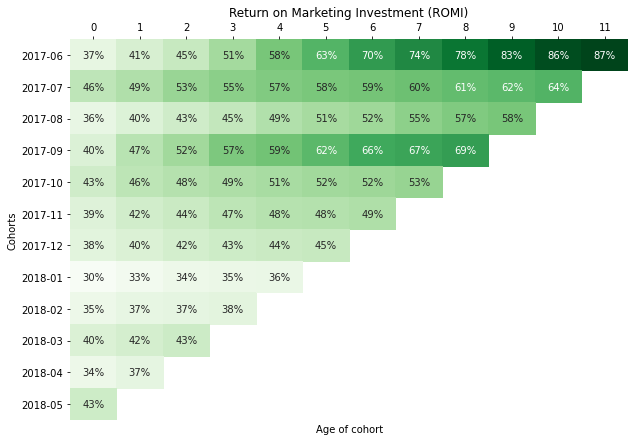

In [89]:
#result visualization
yticklabels=report_ROMI.index.values.astype('datetime64[M]').astype('str')
fig, ax = plt.subplots(figsize= (10, 7))
#heatmap
sns.heatmap(report_ROMI, annot=True, cbar=False, yticklabels=yticklabels, cmap='Greens', fmt='.0%'
           ).set(title = "Return on Marketing Investment (ROMI)", ylabel='Cohorts', xlabel='Age of cohort');
ax.xaxis.tick_top() # x axis on top

According to the chart, the cohort pays off in a little more than a year.

Finally, let's build a correlation matrix to test our findings.

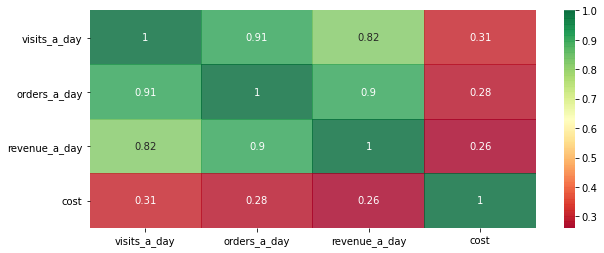

In [90]:
#combine datasets with visits, purchases and marketing costs
#visits
df_visit_per_date= df_visits.groupby('session_date').agg({'uid':'count'})
df_visit_per_date.columns=['visits_a_day']
#orders
df_orders_per_date= df_orders.groupby('purchase_day').agg({'uid':'count','revenue':'sum'})
df_orders_per_date.columns=['orders_a_day','revenue_a_day']
#total dataset
df_total= df_visit_per_date.merge(df_orders_per_date, left_index=True, right_index=True, how='left')
df_total= df_total.merge(df_costs, left_index=True, right_on='cost_dt', how='left')
df_total= df_total.fillna(0)
#correlation matrix
corrMatrix = df_total[['visits_a_day','orders_a_day','revenue_a_day','cost']].corr()

#heatmap chart
plt.figure(figsize=(10,4))
sns.heatmap(corrMatrix, cmap='RdYlGn', annot=True, alpha=.8);

The correlation matrix shows a strong correlation between the number of visits, the number of purchases, and revenue. We also see a weak correlation between ad spend and the number of visits and the number of purchases.

### Conclusion<a class="anchor" id="Conclusion_Part_4">

In summary, we can say the following:
- the schedule of distribution of visits is the same as the schedule of distribution of marketing costs
- the largest marketing inflows occur on channel 3. About the same percentage is spent on marketing channels 4, 5 and 2.
- Customer acquisition cost (CAC). Channels 3 and 2 have the highest values, as well as channel 5 from the middle of the considered period.
- Calculating Cost Per Lead (CPL) is 0.94
- Customer Acquisition Cost (CAC) is almost the same as the Life Value Indicator (LTV)
- Return on Marketing Investment (ROMI) metric shows that costs are paid off within a year
- the correlation matrix showed a weak correlation of marketing expenses with other parameters.

## General conclusion<a class="anchor" id="General_conclusion"></a>
[Go back to the Contents](#contents)

To summarize the above:

The purpose of this study is to determine the patterns of behavior of users of the Yandex.Afisha service platform, taking into account the marketing channels through which they come. And also analyze marketing efforts to attract, retain and generate profit from customers.

To solve this problem, an analysis of Yandex.Afisha data was carried out in terms of product, sales and marketing costs.

We can see that Yandex.Afisha acquisition strategy is strong, with an impressive number of customers converting in the first day for pretty much every cohort.

The Return on Marketing Investment (ROMI) metric for each user cohort indicates that marketing costs are paid back in a little more than a year. <br>
The analysis showed that repeated visits to the platform increase the profit from the user - the amount of the purchase will be higher. Also, the cost of attracting a client to a repeat visit is lower than attracting new clients. This can be seen both in the metrics data and in the analysis of user behavior in cohorts.<br>
Therefore, I suggest that marketers consider increasing the cost of acquiring existing users.

Among advertising channels, I propose to consider the increase in marketing costs for channel 1 as the most profitable and channel 2 as the most stable in all the parameters considered.<br>
According to available data, advertising channel 1 has a relatively low number of visits and the average customer acquisition cost (CAC) is about 0.55. Respectively, I propose to bring to 1, i.e. increase the cost of this channel by 50%. This channel requires costs to attract new customers. Channel 2 shows the average customer acquisition cost (CAC), which is about 0.8. Therefore, I propose to increase costs by 20% to attract users for a repeat visit.

More data is needed for a more accurate result. In particular, data on expenses other than marketing, data on the purpose of marketing expenses, the value of the average gross margin are required. Also, when making a decision, it is necessary to take into account the characteristic features of user behavior on the Yandex.Afisha service platform.